In [1]:
import os
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import Datasets

In [2]:
datasetName, dfAudio, dfMetadata = Datasets.getQOMvsSPA( Datasets.DATASET_RAW, split="estratificado" )

In [3]:
dfMetadata

filenames speakers speakers_agg  \
0     /home/leandro/Data/QOM/Tiago/1era Toma/slices_...      BRE        Mujer   
1     /home/leandro/Data/QOM/Tiago/1era Toma/slices_...      NIL        Mujer   
2     /home/leandro/Data/QOM/Tiago/1era Toma/slices_...      NIL        Mujer   
3     /home/leandro/Data/QOM/Tiago/1era Toma/slices_...      NIL        Mujer   
4     /home/leandro/Data/QOM/Tiago/1era Toma/slices_...      NIL        Mujer   
...                                                 ...      ...          ...   
3848  /home/leandro/Data/QOM/largosCortados/Nahuel/3...      CH1         Niñe   
3849  /home/leandro/Data/QOM/largosCortados/Nahuel/3...      CH3         Niñe   
3850  /home/leandro/Data/QOM/largosCortados/Nahuel/3...      CH3         Niñe   
3851  /home/leandro/Data/QOM/largosCortados/Nahuel/3...      CH3         Niñe   
3852  /home/leandro/Data/QOM/largosCortados/Nahuel/3...      CH3         Niñe   

      durations  labels lang durationsDiscreto labelsDurationsSpeakerAgg  \
0         0.840       0  spa    (0.624, 1.257]    0-Mujer-(0.624, 1.257]   
1         2.350       0  spa    (1.972, 4.972]    0-Mujer-(1.972, 4.972]   
2         2.500       0  spa    (1.972, 4.972]    0-Mujer-(1.972, 4.972]   
3         2.030       0  spa    (1.972, 4.972]    0-Mujer-(1.972, 4.972]   
4         1.080       0  spa    (0.624, 1.257]    0-Mujer-(0.624, 1.257]   
...         ...     ...  ...               ...                       ...   
3848      3.998       1  qom    (1.972, 4.972]     1-Niñe-(1.972, 4.972]   
3849      3.000       1  qom    (1.972, 4.972]     1-Niñe-(1.972, 4.972]   
3850      2.086       1  qom    (1.972, 4.972]     1-Niñe-(1.972, 4.972]   
3851      3.000       1  qom    (1.972, 4.972]     1-Niñe-(1.972, 4.972]   
3852      3.114       1  qom    (1.972, 4.972]     1-Niñe-(1.972, 4.972]   

      kfold  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
3848      4  
3849      4  
3850      4  
3851      4  
3852      4  

[3853 rows x 9 columns]

In [4]:
dfMetadata.kfold.unique()

array([0, 1, 2, 3, 4])

In [5]:
dfMetadata.groupby("kfold").sum()["durations"]/60

kfold
0    22.828914
1    23.553567
2    22.662749
3    22.977129
4    23.690598
Name: durations, dtype: float64

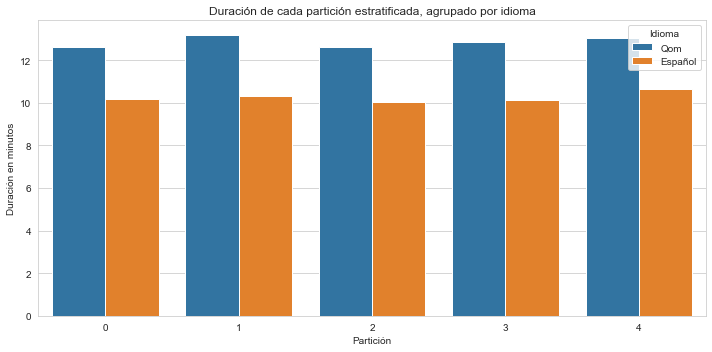

In [10]:
dfViz = dfMetadata.groupby(["kfold","lang"], as_index=False).sum()

dfViz.rename(columns={"lang":"Idioma"}, inplace=True)
dfViz.loc[ dfViz.Idioma == "qom", "Idioma" ] = "Qom"
dfViz.loc[ dfViz.Idioma == "spa", "Idioma" ] = "Español"

plt.figure(figsize=(10, 5))
p = sns.barplot(x="kfold",y=dfViz["durations"]/60, hue="Idioma", data=dfViz)
p.set_xlabel("Partición")
p.set_ylabel("Duración en minutos")
title = "Duración de cada partición estratificada, agrupado por idioma"
plt.title(title)
plt.tight_layout()
plt.savefig(f"plots/{title}.png", dpi=100)

In [11]:
datasetName, dfAudio, dfMetadata = Datasets.getQOMvsSPA( Datasets.DATASET_RAW, split="family")

In [12]:
sns.set_style("whitegrid")

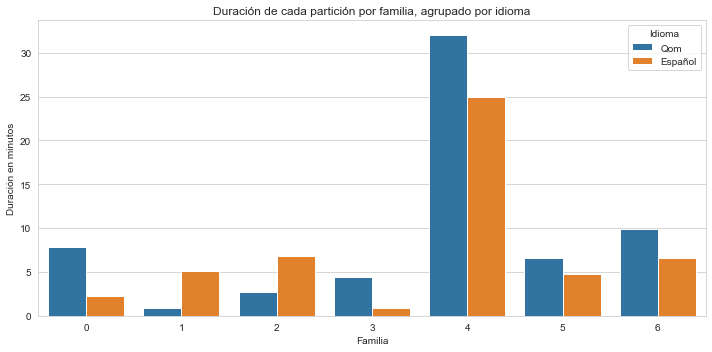

In [13]:
dfViz = dfMetadata.groupby(["kfold","lang"], as_index=False).sum()

dfViz.rename(columns={"lang":"Idioma"}, inplace=True)
dfViz.loc[ dfViz.Idioma == "qom", "Idioma" ] = "Qom"
dfViz.loc[ dfViz.Idioma == "spa", "Idioma" ] = "Español"

plt.figure(figsize=(10, 5))
p = sns.barplot(x="kfold",y=dfViz["durations"]/60, hue="Idioma", data=dfViz)
p.set_xlabel("Familia")
p.set_ylabel("Duración en minutos")
title = "Duración de cada partición por familia, agrupado por idioma"
plt.title(title)
plt.tight_layout()
plt.savefig(f"plots/{title}.png", dpi=100)

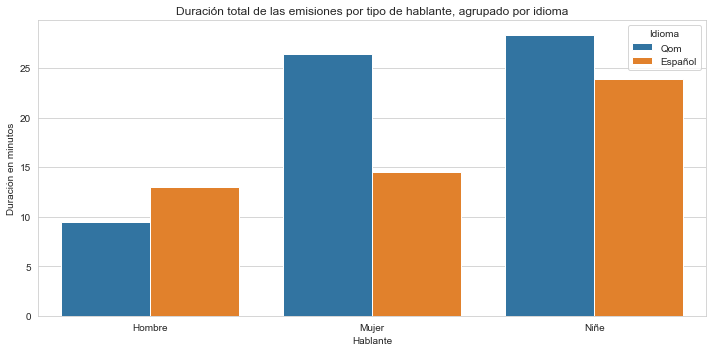

In [8]:
dfViz = dfMetadata.groupby(["speakers_agg","lang"], as_index=False).sum()

dfViz.rename(columns={"lang":"Idioma"}, inplace=True)
dfViz.loc[ dfViz.Idioma == "qom", "Idioma" ] = "Qom"
dfViz.loc[ dfViz.Idioma == "spa", "Idioma" ] = "Español"

plt.figure(figsize=(10, 5))
p = sns.barplot(x="speakers_agg",y=dfViz["durations"]/60, hue="Idioma", data=dfViz)
p.set_xlabel("Hablante")
p.set_ylabel("Duración en minutos")
title = "Duración total de las emisiones por tipo de hablante, agrupado por idioma"
plt.title(title)
plt.tight_layout()
plt.savefig(f"plots/{title}.png", dpi=100)